## Simple Sine Data


In [2]:
# First cell - Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

In [10]:
# Modified cell for dataset creation with exogenous variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Parameters
n_timesteps = 365  # One year
trend_slope = 0.05  # Upward trend
seasonal_amplitude = 3
seasonal_period = 30  # Monthly seasonality
noise_std = 0.3

# Create time index
dates = pd.date_range('2020-01-01', periods=n_timesteps, freq='D')

# Generate signal
time_numeric = np.arange(n_timesteps)
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)
noise = np.random.randn(n_timesteps) * noise_std

# Combine components
values = trend + seasonality + noise

# Create DataFrame with target and components
df = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'noise': noise
}, index=dates)

# Add exogenous variables
# Time features
df['day_of_week_sin'] = np.sin(2 * np.pi * df.index.dayofweek / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df.index.dayofweek / 7)
df['day_of_month_sin'] = np.sin(2 * np.pi * df.index.day / 30)
df['day_of_month_cos'] = np.cos(2 * np.pi * df.index.day / 30)
df['month_sin'] = np.sin(2 * np.pi * df.index.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df.index.month / 12)

# Temperature (correlated with seasonality)
df['temperature'] = 15 + 10 * df['seasonality'] / 3 + np.random.randn(len(df)) * 2

# Holiday indicator (random holidays)
df['is_holiday'] = 0
holiday_indices = np.random.choice(range(len(df)), size=len(df) // 20, replace=False)
df.loc[df.index[holiday_indices], 'is_holiday'] = 1

# Display the first few rows
df.head()

,value,trend,seasonality,noise,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos,temperature,is_holiday
2020-01-01,10.304749,10.00,0.000000,0.304749,0.974928,-0.222521,0.207912,0.978148,0.5,0.866025,13.656298,0
2020-01-02,10.690653,10.05,0.623735,0.016918,0.433884,-0.900969,0.406737,0.913545,0.5,0.866025,15.218260,0
2020-01-03,11.197394,10.10,1.220210,-0.122816,-0.433884,-0.900969,0.587785,0.809017,0.5,0.866025,15.332449,0
2020-01-04,11.928262,10.15,1.763356,0.014906,-0.974928,-0.222521,0.743145,0.669131,0.5,0.866025,19.907487,0
2020-01-05,12.398743,10.20,2.229434,-0.030691,-0.781831,0.623490,0.866025,0.500000,0.5,0.866025,20.939341,0


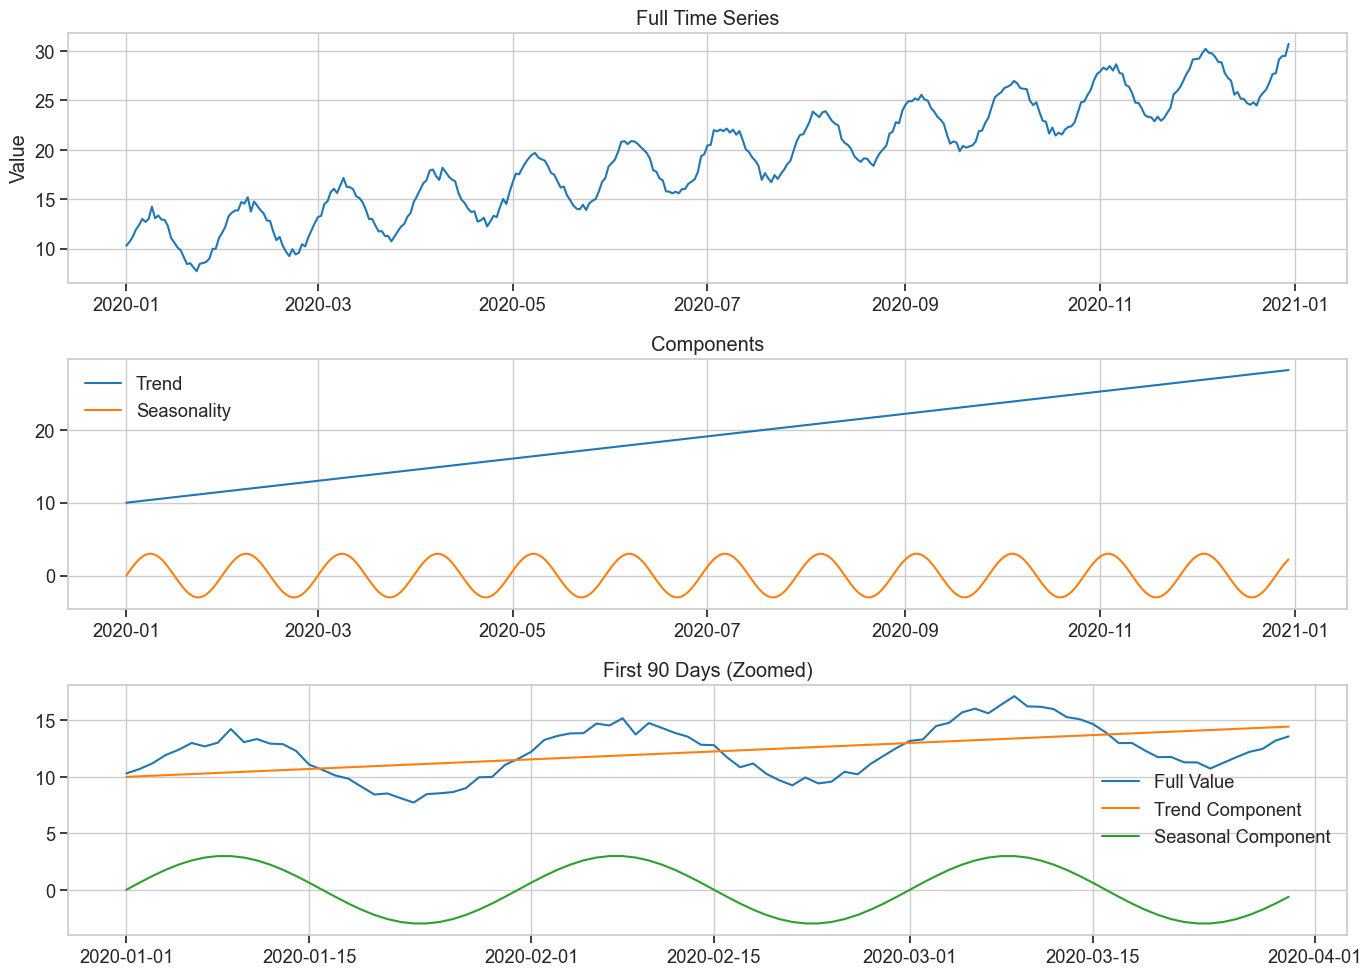

In [ ]:
# Plot the data with exogenous variables
plt.figure(figsize=(16, 16))

# Plot 1: Full time series
plt.subplot(5, 1, 1)
plt.plot(df.index, df['value'])
plt.title('Full Time Series')
plt.ylabel('Value')

# Plot 2: Components
plt.subplot(5, 1, 2)
plt.plot(df.index, df['trend'], label='Trend')
plt.plot(df.index, df['seasonality'], label='Seasonality')
plt.plot(df.index, df['noise'], label='Noise')
plt.title('Main Components')
plt.legend()

# Plot 3: Calendar-based exogenous variables
plt.subplot(5, 1, 3)
plt.plot(df.index, df['day_of_week_sin'], label='Day of Week (sin)', alpha=0.7)
plt.plot(df.index, df['day_of_month_sin'], label='Day of Month (sin)', alpha=0.7)
plt.plot(df.index, df['month_sin'], label='Month (sin)', alpha=0.7)
plt.title('Calendar Exogenous Variables')
plt.legend()

# Plot 4: Temperature exogenous variable and holidays
plt.subplot(5, 1, 4)
plt.plot(df.index, df['temperature'], label='Temperature', color='orange')
plt.scatter(df.index[df['is_holiday'] == 1], 
           df['temperature'][df['is_holiday'] == 1], 
           color='red', label='Holidays', zorder=5)
plt.title('Temperature and Holidays')
plt.legend()

# Plot 5: Zoomed in view (first 90 days)
plt.subplot(5, 1, 5)
plt.plot(df.index[:90], df['value'][:90], label='Full Value')
plt.plot(df.index[:90], df['trend'][:90], label='Trend Component')
plt.plot(df.index[:90], df['seasonality'][:90], label='Seasonal Component')
plt.scatter(df.index[:90][df['is_holiday'][:90] == 1], 
           df['value'][:90][df['is_holiday'][:90] == 1], 
           color='red', label='Holidays', zorder=5)
plt.title('First 90 Days (Zoomed)')
plt.legend()

plt.tight_layout()
plt.show()

Epoch [5/50], Loss: 0.0285
Epoch [10/50], Loss: 0.0112
Epoch [15/50], Loss: 0.0088
Epoch [20/50], Loss: 0.0060
Epoch [25/50], Loss: 0.0023
Epoch [30/50], Loss: 0.0010
Epoch [35/50], Loss: 0.0006
Epoch [40/50], Loss: 0.0005
Epoch [45/50], Loss: 0.0003
Epoch [50/50], Loss: 0.0003
Training completed in 4.32 seconds

LSTM Performance Metrics:
Test MSE: 0.7923
Test RMSE: 0.8901
Test MAE: 0.7261
Inference time: 0.0157 seconds


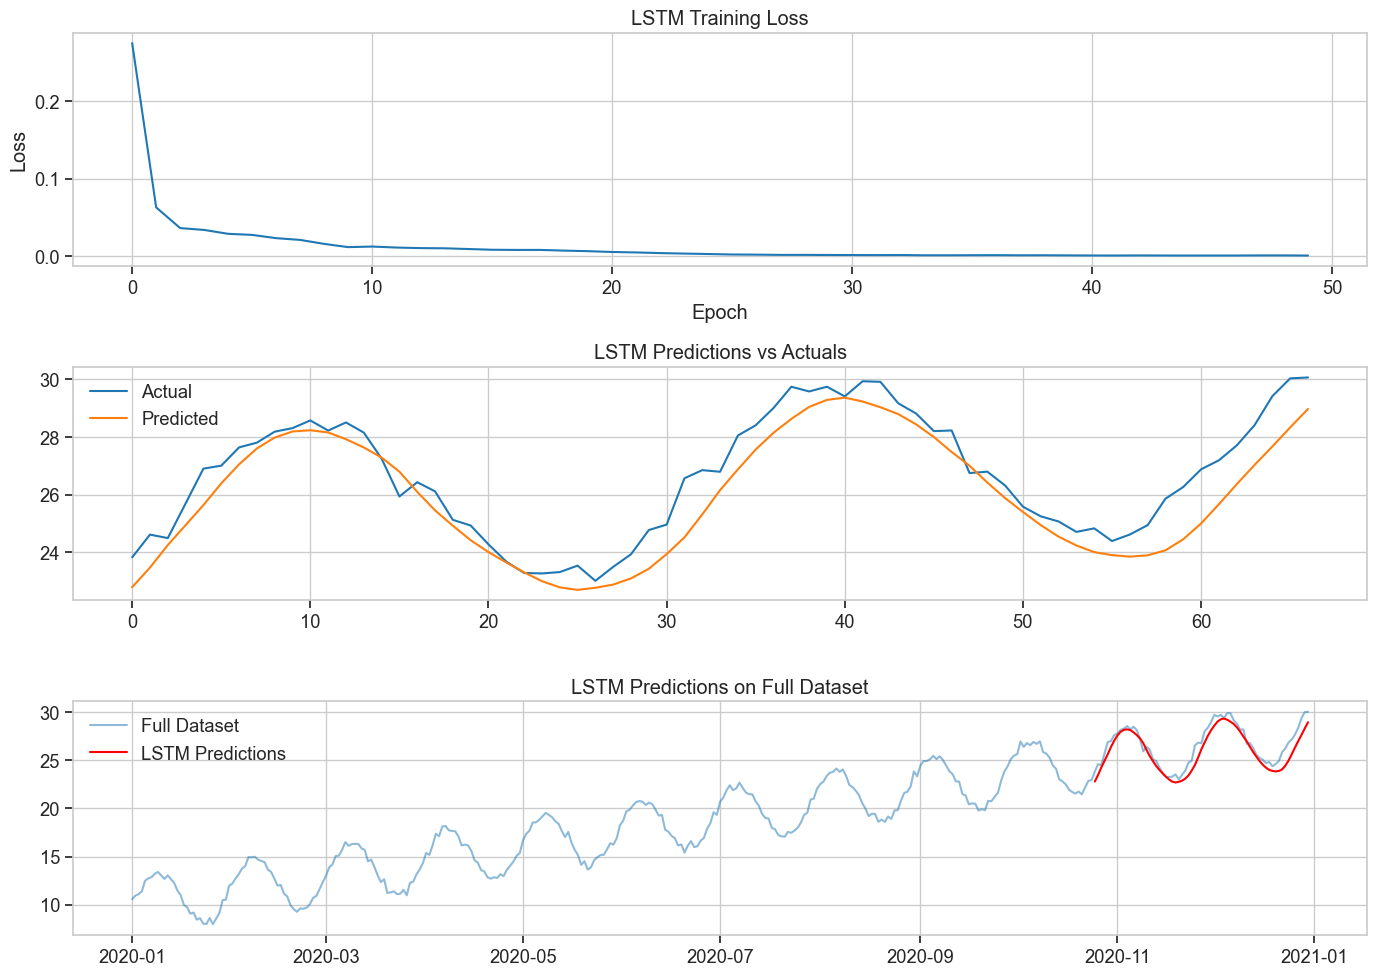

In [8]:
# Import necessary libraries for training
import torch.optim as optim
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
from models.lstm import LSTMModel

# Create sequences function
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Parameters
sequence_length = 30  # Use 30 days of history to predict the next day
lookforward = 7  # Predict 7 days ahead (for multi-step forecasting)
test_ratio = 0.2  # 20% test split

# Scale the data
lstm_scaler = MinMaxScaler()
lstm_values_scaled = lstm_scaler.fit_transform(df[['value']].values)

# Create sequences
lstm_X, lstm_y = create_sequences(lstm_values_scaled, sequence_length)

# Split into train and test sets
lstm_test_size = int(len(lstm_X) * test_ratio)
lstm_train_size = len(lstm_X) - lstm_test_size
lstm_X_train, lstm_X_test = lstm_X[:lstm_train_size], lstm_X[lstm_train_size:]
lstm_y_train, lstm_y_test = lstm_y[:lstm_train_size], lstm_y[lstm_train_size:]

# Convert to PyTorch tensors
lstm_X_train = torch.FloatTensor(lstm_X_train)
lstm_y_train = torch.FloatTensor(lstm_y_train)
lstm_X_test = torch.FloatTensor(lstm_X_test)
lstm_y_test = torch.FloatTensor(lstm_y_test)

# Create data loaders
batch_size = 32
lstm_train_dataset = TensorDataset(lstm_X_train, lstm_y_train)
lstm_test_dataset = TensorDataset(lstm_X_test, lstm_y_test)
lstm_train_loader = DataLoader(lstm_train_dataset, batch_size=batch_size, shuffle=True)
lstm_test_loader = DataLoader(lstm_test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
input_size = 1  # Single feature (value)
lstm_model = LSTMModel(input_size=input_size, hidden_size=64, num_layers=2)
lstm_criterion = nn.MSELoss()
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

# Training
num_epochs = 50
lstm_train_losses = []
lstm_start_time = time.time()

for epoch in range(num_epochs):
    lstm_model.train()
    lstm_running_loss = 0.0
    
    for inputs, targets in lstm_train_loader:
        # Forward pass
        lstm_outputs = lstm_model(inputs)
        lstm_loss = lstm_criterion(lstm_outputs, targets)
        
        # Backward and optimize
        lstm_optimizer.zero_grad()
        lstm_loss.backward()
        lstm_optimizer.step()
        
        lstm_running_loss += lstm_loss.item()
    
    lstm_avg_loss = lstm_running_loss / len(lstm_train_loader)
    lstm_train_losses.append(lstm_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {lstm_avg_loss:.4f}')

lstm_training_time = time.time() - lstm_start_time
print(f"Training completed in {lstm_training_time:.2f} seconds")

# Evaluation
lstm_model.eval()
lstm_predictions = []
lstm_actuals = []
lstm_inference_start = time.time()

with torch.no_grad():
    for inputs, targets in lstm_test_loader:
        outputs = lstm_model(inputs)
        lstm_predictions.append(outputs.numpy())
        lstm_actuals.append(targets.numpy())
    
    # Concatenate batches
    lstm_predictions = np.concatenate(lstm_predictions)
    lstm_actuals = np.concatenate(lstm_actuals)
    
    # Inverse transform to original scale
    lstm_predictions = lstm_scaler.inverse_transform(lstm_predictions)
    lstm_actuals = lstm_scaler.inverse_transform(lstm_actuals)

lstm_inference_time = time.time() - lstm_inference_start

# Calculate metrics
lstm_mse = mean_squared_error(lstm_actuals, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(lstm_actuals, lstm_predictions)

print(f"\nLSTM Performance Metrics:")
print(f"Test MSE: {lstm_mse:.4f}")
print(f"Test RMSE: {lstm_rmse:.4f}")
print(f"Test MAE: {lstm_mae:.4f}")
print(f"Inference time: {lstm_inference_time:.4f} seconds")

# Plot results
plt.figure(figsize=(14, 10))

# Plot 1: Training loss
plt.subplot(3, 1, 1)
plt.plot(lstm_train_losses)
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals
plt.subplot(3, 1, 2)
plt.plot(lstm_actuals, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.title('LSTM Predictions vs Actuals')
plt.legend()

# Plot 3: Predictions in context of the original data
plt.subplot(3, 1, 3)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
lstm_pred_dates = df.index[sequence_length + lstm_train_size:sequence_length + lstm_train_size + len(lstm_predictions)]
plt.plot(lstm_pred_dates, lstm_predictions, label='LSTM Predictions', color='red')
plt.title('LSTM Predictions on Full Dataset')
plt.legend()

plt.tight_layout()
plt.show()

# Store results for later comparison
lstm_results = {
    'model': 'LSTM',
    'mse': lstm_mse,
    'rmse': lstm_rmse,
    'mae': lstm_mae,
    'training_time': lstm_training_time,
    'inference_time': lstm_inference_time,
    'predictions': lstm_predictions,
    'actuals': lstm_actuals,
    'prediction_dates': lstm_pred_dates
}

In [9]:
# Import necessary libraries for N-BEATS training
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time

# Parameters for N-BEATS
nbeats_lookback = 30  # History window size
nbeats_forecast_horizon = 7  # Prediction horizon
nbeats_test_ratio = 0.2
batch_size = 32

# Prepare data for N-BEATS
# Scale target variable
nbeats_scaler_y = StandardScaler()
nbeats_y_scaled = nbeats_scaler_y.fit_transform(df[['value']].values)

# Scale exogenous variables
exog_cols = ['day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin', 
             'day_of_month_cos', 'month_sin', 'month_cos', 'temperature', 'is_holiday']
nbeats_scaler_x = StandardScaler()
nbeats_exog_scaled = nbeats_scaler_x.fit_transform(df[exog_cols].values)

# Create sequences with exogenous variables
def create_nbeats_sequences(data, exog_data, lookback, horizon):
    X, y, X_exog = [], [], []
    for i in range(len(data) - lookback - horizon + 1):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback:i+lookback+horizon])
        X_exog.append(exog_data[i:i+lookback])
    return np.array(X), np.array(y), np.array(X_exog)

nbeats_X, nbeats_y, nbeats_X_exog = create_nbeats_sequences(
    nbeats_y_scaled, nbeats_exog_scaled, nbeats_lookback, nbeats_forecast_horizon)

# Split into train and test sets
nbeats_test_size = int(len(nbeats_X) * nbeats_test_ratio)
nbeats_train_size = len(nbeats_X) - nbeats_test_size

nbeats_X_train = nbeats_X[:nbeats_train_size]
nbeats_y_train = nbeats_y[:nbeats_train_size]
nbeats_X_exog_train = nbeats_X_exog[:nbeats_train_size]

nbeats_X_test = nbeats_X[nbeats_train_size:]
nbeats_y_test = nbeats_y[nbeats_train_size:]
nbeats_X_exog_test = nbeats_X_exog[nbeats_train_size:]

# Convert to PyTorch tensors
nbeats_X_train_tensor = torch.FloatTensor(nbeats_X_train)
nbeats_y_train_tensor = torch.FloatTensor(nbeats_y_train)
nbeats_X_exog_train_tensor = torch.FloatTensor(nbeats_X_exog_train)

nbeats_X_test_tensor = torch.FloatTensor(nbeats_X_test)
nbeats_y_test_tensor = torch.FloatTensor(nbeats_y_test)
nbeats_X_exog_test_tensor = torch.FloatTensor(nbeats_X_exog_test)

# Create data loaders
nbeats_train_dataset = TensorDataset(nbeats_X_train_tensor, nbeats_y_train_tensor, nbeats_X_exog_train_tensor)
nbeats_test_dataset = TensorDataset(nbeats_X_test_tensor, nbeats_y_test_tensor, nbeats_X_exog_test_tensor)

nbeats_train_loader = DataLoader(nbeats_train_dataset, batch_size=batch_size, shuffle=True)
nbeats_test_loader = DataLoader(nbeats_test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the N-BEATS model
nbeats_model = NBeatsX(
    input_size=nbeats_lookback,
    forecast_size=nbeats_forecast_horizon,
    exog_size=len(exog_cols),
    stack_types=['trend', 'seasonality', 'generic'],
    num_blocks_per_stack=[2, 2, 1],  # 2 trend blocks, 2 seasonality blocks, 1 generic block
    hidden_units=64,
    layers=2,
    trend_degree=3,
    seasonality_harmonics=5,
    dropout=0.1,
)

# Loss function and optimizer
nbeats_criterion = nn.MSELoss()
nbeats_optimizer = optim.Adam(nbeats_model.parameters(), lr=0.001)

# Training
num_epochs = 50
nbeats_train_losses = []
nbeats_start_time = time.time()

for epoch in range(num_epochs):
    nbeats_model.train()
    nbeats_running_loss = 0.0
    
    for inputs, targets, exog in nbeats_train_loader:
        # Forward pass
        nbeats_outputs = nbeats_model(inputs, exog)  # Providing exogenous variables
        nbeats_loss = nbeats_criterion(nbeats_outputs, targets)
        
        # Backward and optimize
        nbeats_optimizer.zero_grad()
        nbeats_loss.backward()
        nbeats_optimizer.step()
        
        nbeats_running_loss += nbeats_loss.item()
    
    nbeats_avg_loss = nbeats_running_loss / len(nbeats_train_loader)
    nbeats_train_losses.append(nbeats_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {nbeats_avg_loss:.4f}')

nbeats_training_time = time.time() - nbeats_start_time
print(f"Training completed in {nbeats_training_time:.2f} seconds")

# Evaluation with component analysis
nbeats_model.eval()
nbeats_predictions = []
nbeats_actuals = []
nbeats_components_trend = []
nbeats_components_seasonality = []
nbeats_components_generic = []
nbeats_inference_start = time.time()

with torch.no_grad():
    for inputs, targets, exog in nbeats_test_loader:
        # Get prediction and components
        outputs, components = nbeats_model(inputs, exog, return_components=True)
        
        # Store predictions
        nbeats_predictions.append(outputs.numpy())
        nbeats_actuals.append(targets.numpy())
        
        # Store components
        nbeats_components_trend.append(components[0].numpy())  # Trend component
        nbeats_components_seasonality.append(components[1].numpy())  # Seasonality component
        nbeats_components_generic.append(components[2].numpy())  # Generic component

nbeats_inference_time = time.time() - nbeats_inference_start

# Concatenate batches
nbeats_predictions = np.concatenate(nbeats_predictions)
nbeats_actuals = np.concatenate(nbeats_actuals)
nbeats_components_trend = np.concatenate(nbeats_components_trend)
nbeats_components_seasonality = np.concatenate(nbeats_components_seasonality)
nbeats_components_generic = np.concatenate(nbeats_components_generic)

# Inverse transform to original scale
nbeats_predictions_orig = nbeats_scaler_y.inverse_transform(nbeats_predictions)
nbeats_actuals_orig = nbeats_scaler_y.inverse_transform(nbeats_actuals.reshape(-1, 1)).reshape(nbeats_actuals.shape)
nbeats_components_trend_orig = nbeats_scaler_y.inverse_transform(nbeats_components_trend)
nbeats_components_seasonality_orig = nbeats_scaler_y.inverse_transform(nbeats_components_seasonality)
nbeats_components_generic_orig = nbeats_scaler_y.inverse_transform(nbeats_components_generic)

# Calculate metrics
nbeats_mse = mean_squared_error(nbeats_actuals_orig.reshape(-1), nbeats_predictions_orig.reshape(-1))
nbeats_rmse = np.sqrt(nbeats_mse)
nbeats_mae = mean_absolute_error(nbeats_actuals_orig.reshape(-1), nbeats_predictions_orig.reshape(-1))

print(f"\nN-BEATS Performance Metrics:")
print(f"Test MSE: {nbeats_mse:.4f}")
print(f"Test RMSE: {nbeats_rmse:.4f}")
print(f"Test MAE: {nbeats_mae:.4f}")
print(f"Inference time: {nbeats_inference_time:.4f} seconds")

# Plot results
plt.figure(figsize=(14, 16))

# Plot 1: Training loss
plt.subplot(4, 1, 1)
plt.plot(nbeats_train_losses)
plt.title('N-BEATS Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals
plt.subplot(4, 1, 2)
# Plot first 5 samples for clarity
for i in range(min(5, len(nbeats_actuals_orig))):
    plt.plot(nbeats_actuals_orig[i], label=f'Actual {i+1}' if i == 0 else "", alpha=0.7)
    plt.plot(nbeats_predictions_orig[i], label=f'Predicted {i+1}' if i == 0 else "", linestyle='--', alpha=0.7)
plt.title('N-BEATS Predictions vs Actuals (First 5 samples)')
plt.legend()

# Plot 3: Components for a single example
plt.subplot(4, 1, 3)
example_idx = 0  # First example
plt.plot(nbeats_predictions_orig[example_idx], label='Total Forecast', linewidth=2)
plt.plot(nbeats_components_trend_orig[example_idx], label='Trend Component', linestyle='--')
plt.plot(nbeats_components_seasonality_orig[example_idx], label='Seasonality Component', linestyle='-.')
plt.plot(nbeats_components_generic_orig[example_idx], label='Generic Component', linestyle=':')
plt.title('N-BEATS Component Decomposition (Example)')
plt.legend()

# Plot 4: Predictions in context of the original data
plt.subplot(4, 1, 4)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
nbeats_pred_dates = df.index[nbeats_lookback + nbeats_train_size:nbeats_lookback + nbeats_train_size + len(nbeats_predictions)]
plt.plot(nbeats_pred_dates, nbeats_predictions_orig.reshape(-1), label='N-BEATS Predictions', color='red')
plt.title('N-BEATS Predictions on Full Dataset')
plt.legend()

plt.tight_layout()
plt.show()

# Store results for later comparison
nbeats_results = {
    'model': 'N-BEATS',
    'mse': nbeats_mse,
    'rmse': nbeats_rmse,
    'mae': nbeats_mae,
    'training_time': nbeats_training_time,
    'inference_time': nbeats_inference_time,
    'predictions': nbeats_predictions_orig,
    'actuals': nbeats_actuals_orig,
    'prediction_dates': nbeats_pred_dates,
    'components': {
        'trend': nbeats_components_trend_orig,
        'seasonality': nbeats_components_seasonality_orig,
        'generic': nbeats_components_generic_orig
    }
}

KeyError: "None of [Index(['day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin',\n       'day_of_month_cos', 'month_sin', 'month_cos', 'temperature',\n       'is_holiday'],\n      dtype='object')] are in the [columns]"

|